Exploration of image segmentation...

###  

In [1]:
%matplotlib inline
import pylab
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import pandas as pd


In [2]:
path = "/Users/hrm/Documents/Dropbox/DSrelated/DG_datachallenge/"


In [3]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using TensorFlow backend.


In [4]:
# some example images 
# 188217.tif  | 224968.tif

In [5]:
img1 = load_img(path+'building_set/buildings/188217.tif')
img2 = load_img(path+'building_set/buildings/224968.tif')

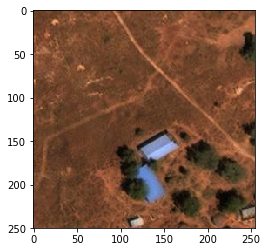

In [6]:
plt.imshow(img1)

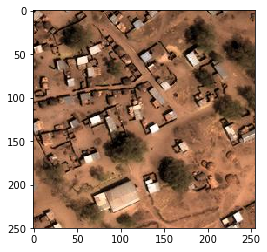

In [7]:
plt.imshow(img2)

In [8]:
img_to_array(img1).shape

(250, 255, 3)

#### Probably best to use 1d image -- greyscale | 1 channel

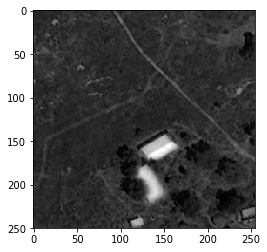

In [9]:
plt.imshow(img_to_array(img1)[:,:,2], cmap='gray')
# plt.imshow(img_to_array(img1), cmap='gray')

In [10]:
from skimage import io
from skimage import filters
from skimage import segmentation

In [11]:
img1_b = img_to_array(img1)[:,:,2]

In [12]:
mask1_b = img1_b > filters.threshold_otsu(img1_b)

In [13]:
clean_border1_b = segmentation.clear_border(mask1_b)

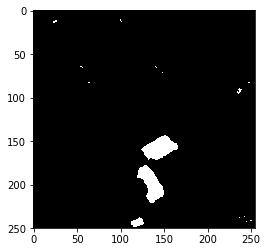

In [14]:
plt.imshow(clean_border1_b, cmap='gray') 

In [15]:
# plt.contour(clean_border1_b)

In [16]:
# some residual specks...

### CompVision toolbox? 
- http://pythonvision.org/basic-tutorial/
- http://mahotas.readthedocs.io/en/latest/index.html

In [17]:
import numpy as np
import pylab

import mahotas as mh  # http://mahotas.readthedocs.io/en/latest/index.html

In [18]:
img1_b2 = img1_b.astype(np.uint8)

In [19]:
img1_b2

array([[46, 44, 42, ..., 44, 44, 44],
       [39, 39, 44, ..., 48, 50, 44],
       [35, 38, 48, ..., 48, 51, 41],
       ..., 
       [54, 53, 48, ..., 75, 83, 93],
       [48, 50, 48, ..., 74, 67, 73],
       [47, 52, 51, ..., 68, 62, 63]], dtype=uint8)

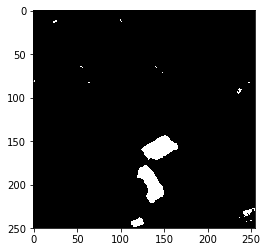

In [20]:
T = mh.thresholding.otsu(img1_b2)
pylab.imshow(img1_b2 > T, cmap='gray')
pylab.show()

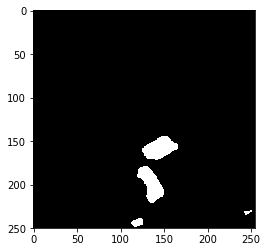

In [21]:
img1_bF = mh.gaussian_filter(img1_b2, 1.45)
img1_bF = img1_bF.astype(np.uint8)
Tf1 = mh.thresholding.otsu(img1_bF)
pylab.imshow(img1_bF > Tf1, cmap='gray')
pylab.show()

In [ ]:
# http://en.wikipedia.org/wiki/Connected-component_labeling

possible # of buildings : 4


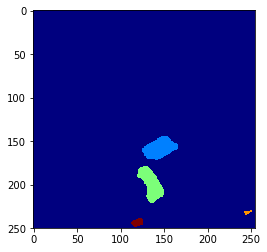

In [22]:
labeled,Nobjs = mh.label(img1_bF > Tf1)
print ('possible # of buildings : ' + format(Nobjs))
pylab.imshow(labeled)
pylab.jet()
pylab.show()

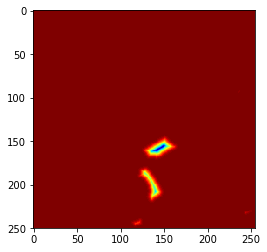

In [34]:
# Watershed ? 'edge|boundary' detection process ?

img1_bF2 = mh.gaussian_filter(img1_b2, 1.25)
T1 = mh.thresholding.otsu(img1_b2)
dist = mh.distance(img1_bF2 > T1)
dist = dist.max() - dist
dist -= dist.min()
dist = dist/float(dist.ptp()) * 255
dist = dist.astype(np.uint8)
pylab.imshow(dist)
pylab.show()


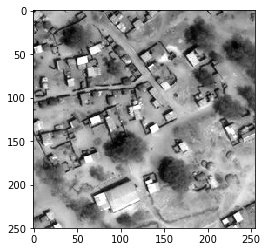

In [24]:
plt.imshow(img_to_array(img2)[:,:,0], cmap='gray')

In [25]:
img2_r = img_to_array(img2)[:,:,2]
img2_r2 = img2_r.astype(np.uint8)

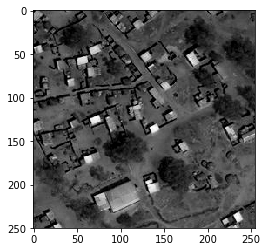

In [26]:
plt.imshow(img_to_array(img2)[:,:,2], cmap='gray')

In [27]:
img2_b = img_to_array(img2)[:,:,2]
img2_b2 = img2_b.astype(np.uint8)

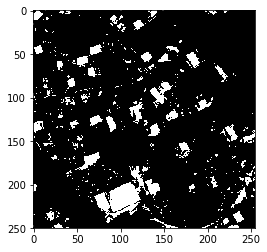

In [28]:
T2 = mh.thresholding.otsu(img2_b2)
pylab.imshow(img2_b2 > 1.65*T2, cmap='gray')
pylab.show()

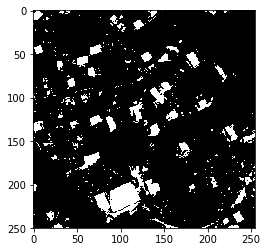

In [29]:
img2_bF = mh.gaussian_filter(img2_b2, 0.35)
img2_bF = img2_bF.astype(np.uint8)
Tf2 = mh.thresholding.otsu(img2_bF)
pylab.imshow(img2_bF > 1.65*Tf2, cmap='gray')
pylab.show()

possible # of building pixels? : 493


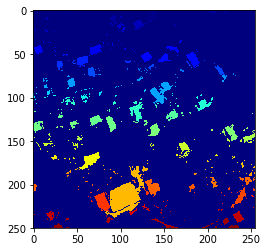

In [30]:
labeled,Nobjs = mh.label(img2_bF > 1.65*Tf2)
print ('possible # of building pixels? : ' + format(Nobjs))
pylab.imshow(labeled)
pylab.jet()
pylab.show()

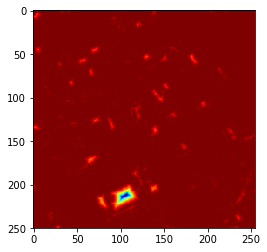

In [31]:
# Watershed ?
img2_bF2 = mh.gaussian_filter(img2_b2, 0.35)
T2 = mh.thresholding.otsu(img2_b2)
dist = mh.distance(img2_bF2 > 1.65*T2)
dist = dist.max() - dist
dist -= dist.min()
dist = dist/float(dist.ptp()) * 255
dist = dist.astype(np.uint8)
pylab.imshow(dist)
pylab.show()
